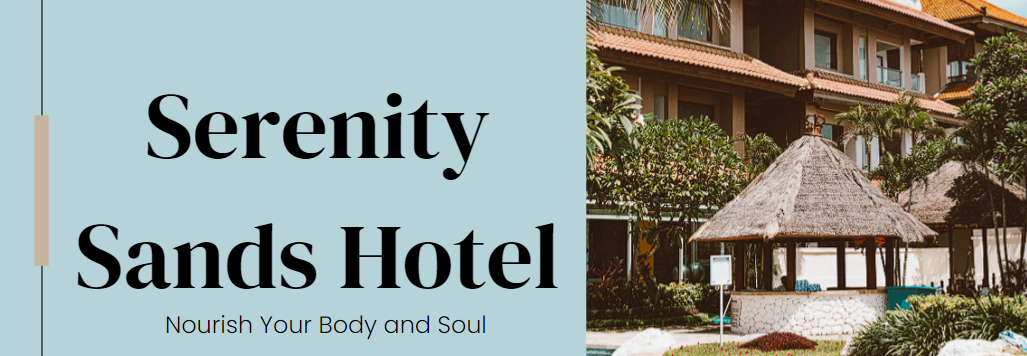

**Introducción**

Podemos identificar de entrada que la intención de este analisis es verificar la concurrecia de huespedes, de donde nos visitan, cuanto tiempo tienen de estadia en nuestras istalaciones, cuales de nuestros servicios son los mas utilizados, el mismo se empleara para conocer mejor a nuestros visitantes, las temporadas altas y bajas, ademas de las posibles ganancias a traves de las reservas realizadas.

**Preguntas:**

*   ¿Cuál es la distribución de la duración de las estadías en el hotel?
*   ¿Cuáles son los tipos de habitaciones más populares entre los huéspedes?
*   ¿Existe una relación entre la duración de la estadía y el tipo de habitación reservada?
*   ¿Qué porcentaje de huéspedes solicita servicios adicionales como desayuno, paquete de spa o recogida en el aeropuerto?
*   ¿Cuál es la distribución de edades de los huéspedes y cómo se relaciona con la duración de la estadía o los servicios solicitados?
*   ¿Hay alguna tendencia temporal en las reservas, como picos en ciertas épocas del año?

**Hipótesis:**

*   La duración media de la estadía en habitaciones de lujo es mayor que en habitaciones estándar.
*   Los huéspedes que solicitan el paquete de spa tienden a quedarse más tiempo en el hotel.
*   Existe una correlación positiva entre la edad de los huéspedes y la probabilidad de solicitar servicios adicionales.
*   Las reservas realizadas durante los meses de verano tienen una duración media más larga que las realizadas en otros períodos del año.
*   Los huéspedes de ciertas nacionalidades pueden tener preferencias distintas en cuanto a tipos de habitaciones o servicios adicionales.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Serenity_sands=pd.read_excel("Hotel Reservations Data.xlsx")
Serenity_sands

,Reservation ID,Guest ID,First Name,Last Name,Gender,Email,Phone,Nationality,Birthdate,Address,...,Payment Status,Special Requests,Reservation Source,Booking Date,Check-in Time,Check-out Time,Breakfast Included,Spa Package Included,Airport Pickup Included,Room Type Rate
0,1001,101,Laura,Weiss,Male,xconley@example.org,+1-777-290-9299x1874,Sweden,1990-06-20,194 Stewart Squares,...,Paid,They operation listen office no authority last...,Walk-in,2022-05-26,01:13:28,19:11:56,Yes,No,No,233
1,1002,102,Austin,Henderson,Female,williamaustin@example.org,4268908795,Cyprus,1999-07-22,31442 Morris Port Apt. 423,...,Pending,Agreement every land car.,Phone,2022-11-27,16:05:00,21:09:16,No,Yes,Yes,132
2,1003,103,Jamie,Smith,Male,benjaminporter@example.com,+1-563-234-8041x0677,Italy,1978-09-16,851 Ashley Junctions Apt. 370,...,Paid,Say exactly total field American.,Website,2022-07-22,18:54:33,23:34:07,No,Yes,No,88
3,1004,104,Brian,Erickson,Male,johnmelton@example.org,+1-377-838-9030x072,Slovakia,1958-02-21,7221 Lewis Burg,...,Pending,Operation better present effort teacher huge end.,Walk-in,2022-01-22,13:48:30,09:00:01,No,Yes,Yes,227
4,1005,105,Cristian,Taylor,Male,salazarkelly@example.com,5043212352,Norway,1984-11-30,9874 Melanie Ford Suite 715,...,Pending,Board little they really office.,Booking Platform,2022-06-15,15:32:38,23:48:24,Yes,No,Yes,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,37028,36128,Sean,Bowen,Female,newmansophia@example.org,001-271-583-7480x5708,Czech Republic,2004-06-10,0406 Carrie Extension Apt. 326,...,Paid,Sea onto thought affect think kid man site.,Website,2023-09-01,22:32:51,00:31:12,Yes,Yes,No,213
9970,37029,36129,Linda,Obrien,Female,keith37@example.com,355.806.5829x183,Russia,2001-02-25,7525 Brenda Plains Suite 230,...,Pending,Scientist happy throughout usually rate cup.,Website,2023-07-26,22:47:43,01:33:13,No,Yes,Yes,135
9971,37030,36130,Travis,Armstrong,Female,wjones@example.net,877.719.4173,Belgium,1994-05-05,53480 William Parkway Apt. 944,...,Pending,Next rate personal human himself clear issue.,Walk-in,2023-07-23,09:53:19,12:08:55,No,Yes,Yes,126
9972,37031,36131,Ralph,Lucas,Male,gonzalezangela@example.com,+1-640-980-2360x241,Malta,1970-10-17,89549 Angela Stream Apt. 725,...,Paid,Their word traditional professional man today ...,Phone,2023-01-26,16:41:16,07:02:17,No,No,Yes,85


In [ ]:
Serenity_sands.columns

Index(['Reservation ID', 'Guest ID', 'First Name', 'Last Name', 'Gender',
       'Email', 'Phone', 'Nationality', 'Birthdate', 'Address', 'City',
       'Postal Code', 'Country', 'Check-in Date', 'Check-out Date',
       'Room Number', 'Floor Number', 'Room Type', 'Adults', 'Children',
       'Total Nights', 'Total Amount', 'Payment Status', 'Special Requests',
       'Reservation Source', 'Booking Date', 'Check-in Time', 'Check-out Time',
       'Breakfast Included', 'Spa Package Included', 'Airport Pickup Included',
       'Room Type Rate'],
      dtype='object')

De acuerdo a las columnas de la base de datos, estas son las definiciones de los datos que contienen:

*  ID de Reservación: Un identificador único para la reservación realizada.
*  ID de Huésped: Un identificador único de la persona que realizó la reservación (es decir, el huésped principal).
*   Nombre: El primer nombre del huésped principal.
*   Apellido: El apellido del huésped principal.
*   Género: El género del huésped principal.
*   Correo Electrónico: El correo electrónico del huésped principal.
*   Teléfono: El número de teléfono del huésped principal.
*   Nacionalidad: La nacionalidad del huésped principal.
*   Fecha de Nacimiento: La fecha de nacimiento del huésped principal.
*   Dirección: La dirección de residencia del huésped principal.
*   Ciudad: La ciudad donde vive el huésped principal.
*   Código Postal: El código postal del huésped principal.
*   País: El país de residencia del huésped principal.
*   Fecha de Entrada: La fecha programada de entrada para la reservación.
*   Fecha de Salida: La fecha programada de salida para la reservación.
*   Número de Habitación: El número de habitación de la reservación.
*   Número de Piso: El piso de la habitación reservada.
*   Tipo de Habitación: El tipo de habitación reservada.
*   Adultos: El número de adultos que se alojarán.
*   Niños: El número de niños que se alojarán.
*   Noches Totales: El número total de noches reservadas para alojarse en el hotel.
*   Monto Total: El monto total pagado por la reservación.
*   Estado del Pago: El estado del pago en el momento de la reservación.
*   Solicitudes Especiales: Tratamiento especial solicitado por los huéspedes.
*   Fuente de la Reservación: La fuente utilizada por el huésped para reservar una habitación.
*   Fecha de Reservación: La fecha en que se realizó la reservación.
*   Hora de Entrada: La hora programada de entrada.
*   Hora de Salida: La hora programada de salida.
*   Desayuno Incluido: Si la reservación incluía un desayuno pagado.
*   Paquete de Spa Incluido: Si la reservación incluía un paquete de spa pagado.
*   Recogida en el Aeropuerto Incluida: Si el huésped solicitó recogida en el aeropuerto.
*   Tarifa del Tipo de Habitación: Cuánto costaba cada habitación en el momento de la reservación.





**Identificación de datos nulos**

Realizamos una suma de valores y utilizando la función ".is.null", podemos identificar que nuestra base de datos no posee datos Null los cuales debamos trabajar antes de iniciar el analisis básico.



In [ ]:
#nulos
Serenity_sands.isnull().sum().sort_values(ascending=False)

Reservation ID             0
Guest ID                   0
Airport Pickup Included    0
Spa Package Included       0
Breakfast Included         0
Check-out Time             0
Check-in Time              0
Booking Date               0
Reservation Source         0
Special Requests           0
Payment Status             0
Total Amount               0
Total Nights               0
Children                   0
Adults                     0
Room Type                  0
Floor Number               0
Room Number                0
Check-out Date             0
Check-in Date              0
Country                    0
Postal Code                0
City                       0
Address                    0
Birthdate                  0
Nationality                0
Phone                      0
Email                      0
Gender                     0
Last Name                  0
First Name                 0
Room Type Rate             0
dtype: int64

**Información general: Tipos de datos**

Identificamos las columnas y los tipos de datos que podemos llegar a encontrar dentro de las mismas, esto nos ayuda a conocer el dataset que tenemos para analizar. Inclusive podemos ver que reafirmamos que nuestro data ser no posee datos nulos.


In [ ]:
print(Serenity_sands.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Reservation ID           9974 non-null   int64         
 1   Guest ID                 9974 non-null   int64         
 2   First Name               9974 non-null   object        
 3   Last Name                9974 non-null   object        
 4   Gender                   9974 non-null   object        
 5   Email                    9974 non-null   object        
 6   Phone                    9974 non-null   object        
 7   Nationality              9974 non-null   object        
 8   Birthdate                9974 non-null   datetime64[ns]
 9   Address                  9974 non-null   object        
 10  City                     9974 non-null   object        
 11  Postal Code              9974 non-null   int64         
 12  Country                  9974 non-

**Datos numericos relevantes**

De acuerdo a la información que poseemos, seleccionamos las columnas que pueden darnos datos numericos a traves de la suma, esto nos ayuda a identificar de cuantos huespedes estamos hablando, clasificandolos como niños y adultos, cuantas noches en general tenemos registradas de e4stadia y ademas el monto total pagado a traves de las reservaciones.

In [ ]:
Totales_general =(Serenity_sands[['Adults', 'Children','Total Nights', 'Total Amount']].sum())
Totales_general

Adults            24905
Children           9856
Total Nights      28198
Total Amount    4076973
dtype: int64

**Cantidad de reservas a lo largo del tiempo**

La cantidad de datos con respecto a las reservas se generan a partir de los años 2022 y 2023, en este caso identificamos la cantidad de reservas generadas por mes en cada uno de esos años, la intención dewl analisis es identificar las temporadas altas y bajas con respecto a la demanda de habitaciones.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Serenity_sands['Booking Date'] = pd.to_datetime(Serenity_sands['Booking Date'])

# Extraer el año y mes de la fecha de reserva
Serenity_sands['Year Period'] = Serenity_sands['Booking Date'].dt.year
Serenity_sands['Month Period'] = Serenity_sands['Booking Date'].dt.month

# Agrupar por año y mes y contar la cantidad de reservas
reservas_por_mes = Serenity_sands.groupby(['Year Period', 'Month Period']).size().unstack()
reservas_por_mes


Month Period,1,2,3,4,5,6,7,8,9,10,11,12
Year Period,,,,,,,,,,,,
2022,397,373,433,373,402,383,405,381,395,408,396,412
2023,406,417,434,434,447,425,454,427,411,463,431,467


**Analisis grafico de reservas a lo largo del tiempo**

En este caso podemos identificar que en el año 2023 la demanda mas alta fue para fin de año, abarcando los meses de Noviembre y Diciembre, por otro lado en cuando al año 2022 la temporada mas alta fue en el mes de Marzo, que iguala la cantidad de reservas del año 2023 en el mismo mes, podriamos deducir del grafico que las temporadas de medio y fin de año son las mas altas.

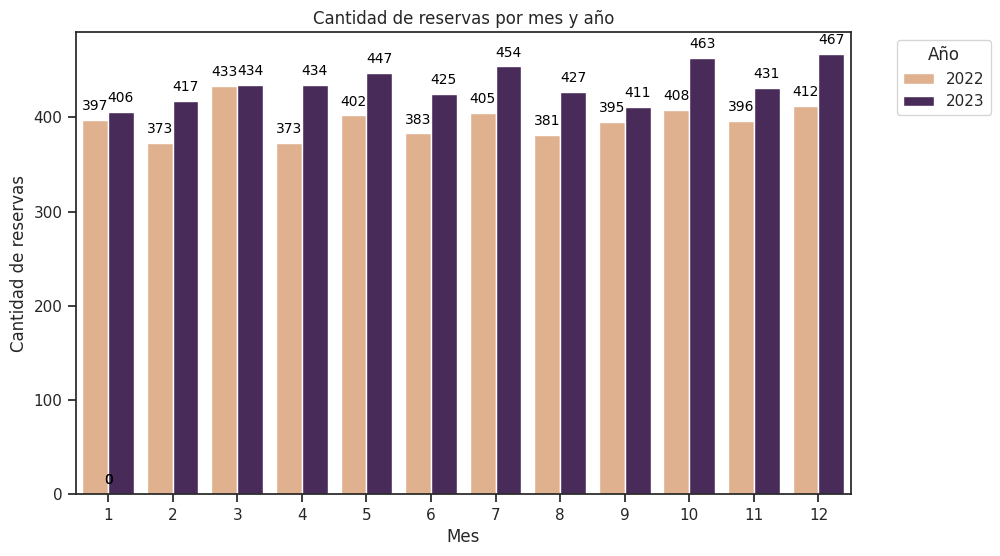

In [ ]:

# Reestructurar el DataFrame para Seaborn
reservas_por_mes2 = reservas_por_mes.melt(ignore_index=False).reset_index()

# Graficar usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=reservas_por_mes2, x='Month Period', y='value', hue='Year Period', palette="flare")

plt.title('Cantidad de reservas por mes y año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de reservas')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Agregar etiquetas de datos
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

**Reservas en cantidad de noches**
A diferencia del grafico anterior, en esta ocasión podemos identificar la cantidad de noches que esta ocupado nuestro hotel de acuerdo a la frecuencia de noches que se quedan nuestros huespedes, podemos ver que la mayoria se hospedan el menor tiempo posible, esto genera que tengamos huespedes transitorios.

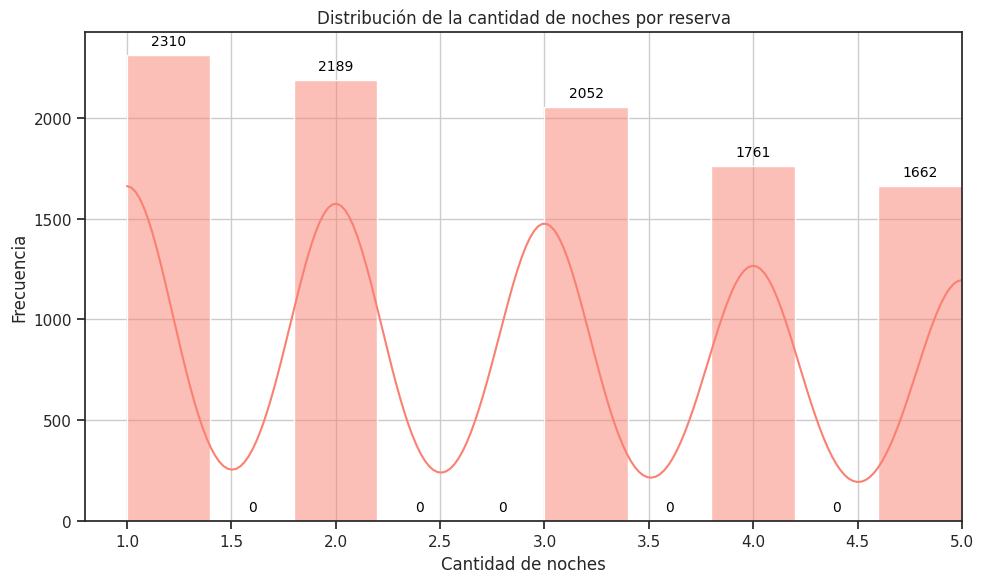

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=Serenity_sands, x='Total Nights', bins=10, kde=True, color='Salmon')
plt.title('Distribución de la cantidad de noches por reserva')
plt.xlabel('Cantidad de noches')
plt.ylabel('Frecuencia')
plt.grid(True)

# Ajustar rango del eje x
plt.xlim(right=5)  # Excluir valores extremadamente bajos

# Agregar etiquetas de datos
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**Caracteristicas de las habitaciones disponibles en Serenity Sands Resort**

**Habitación Deluxe:**

Amplia y lujosa habitación con vista al mar.
Cama king-size con colchón de lujo y sábanas de alta calidad.
Baño privado con bañera de hidromasaje y ducha de lluvia.
Balcón privado con sillas y mesa para disfrutar de la vista al mar.

TV de pantalla plana de 55 pulgadas con canales premium.
Mini bar surtido con bebidas y aperitivos de cortesía.
Servicio de habitaciones las 24 horas.

**Suite Familiar:**

Espaciosa suite perfecta para familias.
Dos habitaciones separadas: una para los padres y otra para los niños.
Cama king-size en la habitación principal y literas en la habitación infantil.
Baño privado en cada habitación con amenities para adultos y niños.
Zona de estar con sofá, mesa de comedor y TV de pantalla plana.
Cocina completamente equipada con nevera, microondas y cafetera.
Balcón privado con vista a la piscina y áreas de juegos para niños.
Acceso gratuito al club infantil con actividades supervisadas.

**Habitación Estándar:**

Cómoda habitación para parejas o viajeros individuales.
Cama queen-size con ropa de cama de calidad y almohadas suaves.
Baño privado con ducha y artículos de tocador básicos.
Escritorio de trabajo con silla ergonómica y conexión Wi-Fi gratuita.
TV de pantalla plana con canales por cable y películas a pedido.
Armario empotrado con perchas y espacio de almacenamiento.
Ventana con vistas al jardín o a la ciudad.
Servicio diario de limpieza y cambio de toallas.

**Descripción analitica de tipos de habitación con sus valores de pago a traves de reservas**

  En este caso podemos identificar el analisis sobre el valor abonado por los huespedes al momento de reservar agrupado a traves de los tipos de habitación, esto nos permite ver por ejemplo que el promedio mas alto en abonos corresponde a la habitación tipo suite con 632 usd.

In [ ]:
total_ingreso_por_tipo_habitacion = Serenity_sands.groupby('Room Type')['Total Amount'].describe().round()
total_ingreso_por_tipo_habitacion

,count,mean,std,min,25%,50%,75%,max
Room Type,,,,,,,,
Deluxe,3392.0,383.0,191.0,120.0,246.0,381.0,548.0,750.0
Standard,3299.0,213.0,108.0,60.0,126.0,204.0,300.0,450.0
Suite,3283.0,632.0,323.0,200.0,400.0,630.0,908.0,1250.0


**Tarifas de las habitaciones de acuerdo la temporada y tipo de habitación**

Poemos identificar en el grafico cuales son las temporadas mas economicas con respecto a las tarifas generales de las habitaciones, la habitación Deluxe se presenta economica en el mes de Febrero, sin embarfo la habitación Standard se presenta como una gran opción en los meses de DIciembre y Enero, y la Deluxe para las vacaciones de Julio y Agosto.

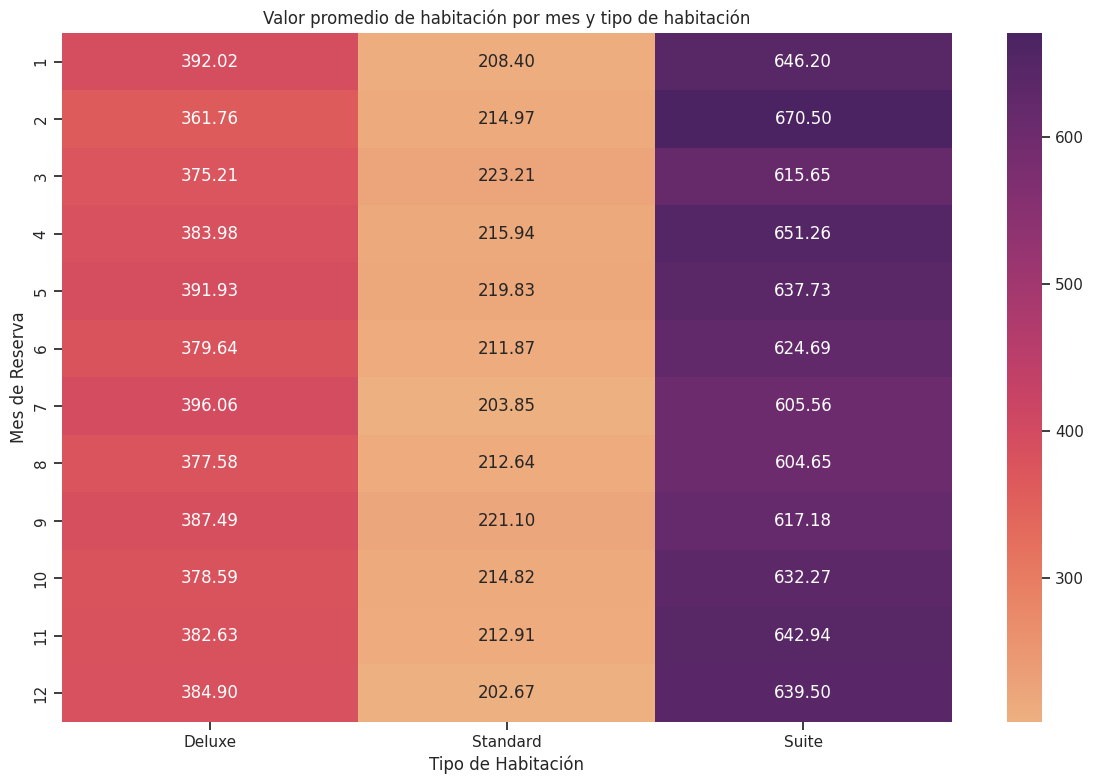

In [ ]:

valor_promedio_por_mes_y_tipo_habitacion = Serenity_sands.groupby(['Month Period', 'Room Type'])['Total Amount'].mean().unstack()

# Graficar un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(valor_promedio_por_mes_y_tipo_habitacion,cmap='flare', annot=True, fmt=".2f")
plt.title('Valor promedio de habitación por mes y tipo de habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Mes de Reserva')
plt.tight_layout()
plt.show()

**Ingresos por tipo de habitación**

Relizamos la suma de todos los montos abonados para agrupar por tipo de habitación, como bien identificamos efectivamente la habitación tipo suite es de que mas ganancias podemos apreciar. Seguido por las habitaciones deluxe.

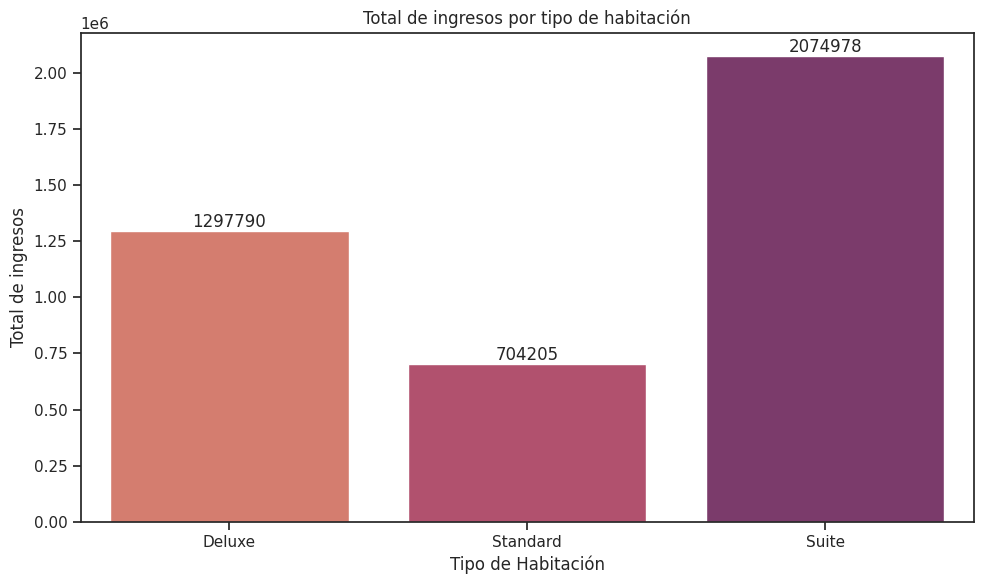

In [ ]:
total_ingreso_por_tipo_habitacion2 = Serenity_sands.groupby('Room Type')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=total_ingreso_por_tipo_habitacion.index, y=total_ingreso_por_tipo_habitacion.values, hue=total_ingreso_por_tipo_habitacion.index, palette='flare', legend=False)
plt.title('Total de ingresos por tipo de habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Total de ingresos')

for i in range(len(total_ingreso_por_tipo_habitacion)):
    plt.text(x=i, y=total_ingreso_por_tipo_habitacion.values[i], s=total_ingreso_por_tipo_habitacion.values[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Verificando el estado de pagos**

Podemos identificar que el hotel no posee una politica de pagos inmediatos ante el servicio, por ende identificamos que varios de los pagos aun estan en estado pendiente, a pesar de observar gran concurrencia con las habitaciones tipo suite, podemos identificar que caso el 50% de los pagos no se realizaron aun, no permitiendo que podamos contar todo como un ingreso total.

In [ ]:
ingresos_por_tipo_y_estado

Payment Status,Room Type,Paid,Pending
0,Deluxe,640340,657450
1,Standard,356771,347434
2,Suite,1029642,1045336


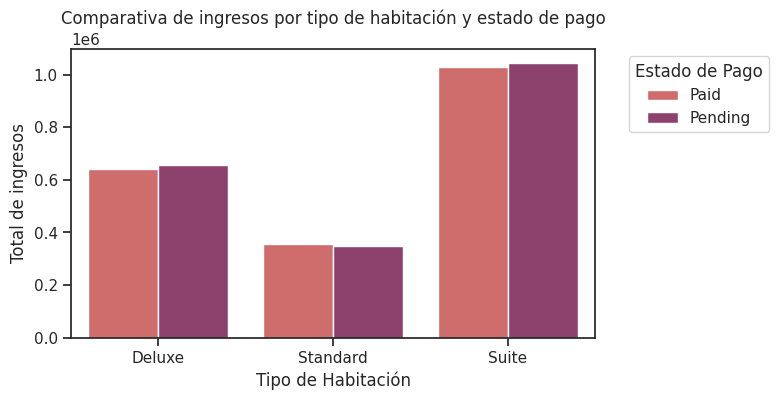

,Room Type,Payment Status,Total Amount
0,Deluxe,Paid,640340
1,Standard,Paid,356771
2,Suite,Paid,1029642
3,Deluxe,Pending,657450
4,Standard,Pending,347434
5,Suite,Pending,1045336


In [ ]:

# Calcular los ingresos totales por tipo de habitación y estado de pago
ingresos_por_tipo_y_estado = Serenity_sands.groupby(['Room Type', 'Payment Status'])['Total Amount'].sum().unstack()

# Resetear el índice para que 'Room Type' sea una columna esto con la intención de poder usarlo en el grafico.
ingresos_por_tipo_y_estado = ingresos_por_tipo_y_estado.reset_index()

# Convertir las columnas de los estados de pago en una sola columna utilizando melt, de esta forma podemos generar un pequeño dataset comprimiendo los datos.De esta
#forma podemos dilucidar el monto por cada estado de pago.
ingresos_por_tipo_y_estado_unificado = ingresos_por_tipo_y_estado.melt(id_vars='Room Type', var_name='Payment Status', value_name='Total Amount')

# Gráfico de barras agrupado

plt.figure(figsize=(8, 4))

sns.barplot(data=ingresos_por_tipo_y_estado_unificado, x='Room Type', y='Total Amount', palette='flare', hue='Payment Status')
plt.title('Comparativa de ingresos por tipo de habitación y estado de pago')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Total de ingresos')
plt.legend(title='Estado de Pago', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

#Se suma la información utlizada para el gráfico.
ingresos_por_tipo_y_estado_unificado

**Habitaciones mas reservadas**

En este caso generamos un gtrafico de torta, para visualizar de forma mas llamativa cual de lo tipos de habitación es la mas reservada, en este caso podemos identificar quer es la tipo deluxe, sin embargo podemos identificar que es poca la diferencia entre las demas llevandose casi un 2% entre cada una.

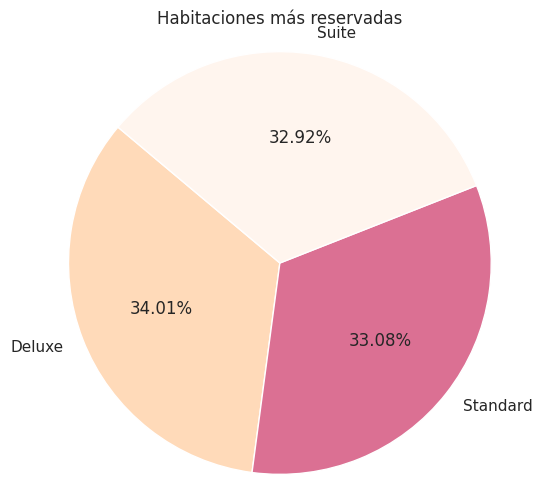

In [ ]:
#Identificamos la variable para definir las habitaciones mas reservadas.
habitaciones_mas_reservadas = Serenity_sands['Room Type'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))
habitaciones_mas_reservadas.plot(kind='pie', autopct='%2.2f%%', startangle=140, colors=['PeachPuff','PaleVioletRed','SeaShell'])
plt.title('Habitaciones más reservadas')
plt.ylabel('')
# Hace que el gráfico de torta tenga un aspecto circular
plt.axis('equal')
# Mostrar los gráficos
plt.show()

**Nacionalidades**

En este caso podemos identificar que la mayoria de nuestros huespedes son de nacionalidad Estadounidense, seguidos de Bulgaria, Romania e Italia.

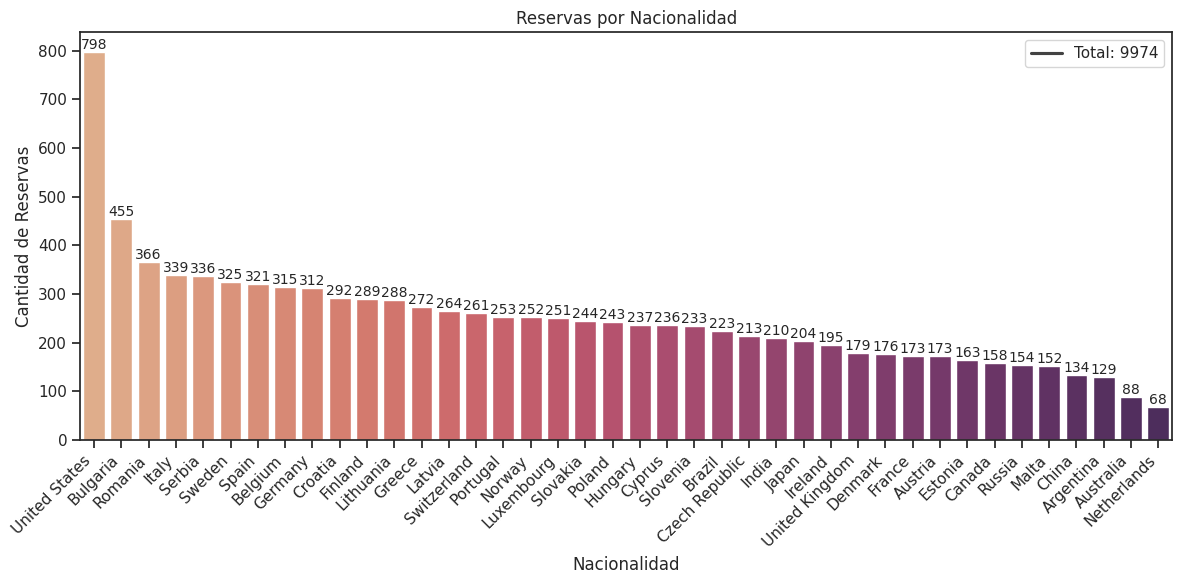

In [ ]:

reservas_por_nacionalidad = Serenity_sands['Nationality'].value_counts().reset_index()
reservas_por_nacionalidad.columns = ['Nacionalidad', 'Cantidad de Reservas']
total_reservas = reservas_por_nacionalidad['Cantidad de Reservas'].sum()

# Crear un gráfico de barras para visualizar las reservas por nacionalidad
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=reservas_por_nacionalidad, x='Nacionalidad', y='Cantidad de Reservas',hue='Nacionalidad',palette='flare')

# Establecer títulos y etiquetas de ejes
plt.title('Reservas por Nacionalidad')
plt.xlabel('Nacionalidad')
plt.ylabel('Cantidad de Reservas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend([f'Total: {total_reservas}'], loc='upper right')

# Establecer títulos y etiquetas de ejes
for index, value in enumerate(reservas_por_nacionalidad['Cantidad de Reservas']):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Mostrar los gráficos
plt.show()

**Distribución por genero y edad**

Podemos identificar que de la totalidad de nuestros huespedes teniendo en cuenta que su gran mayoria son adultos, entre los generos no se posee una diferencia notoria, al contrario podemos identificar que mabos se encuentran dentro de los parametros equilibrados.

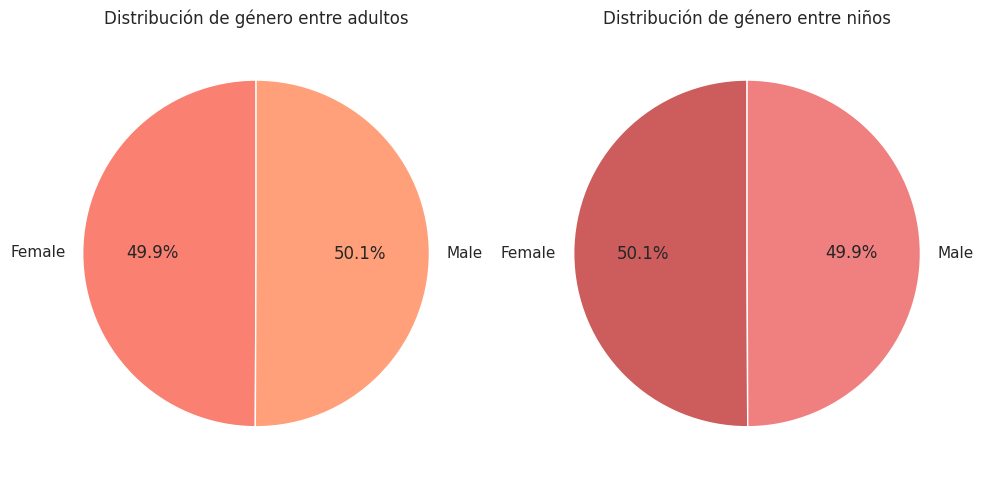

Adults            24905
Children           9856
Total Nights      28198
Total Amount    4076973
dtype: int64

In [ ]:
genero_adultos = Serenity_sands.groupby('Gender')['Adults'].sum()
genero_niños = Serenity_sands.groupby('Gender')['Children'].sum()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Etiquetas y colores para los géneros
labels = genero_adultos.index
colors = ['#ff9999','#66b3ff','#99ff99']

# Crear gráfico de torta para adultos
axs[0].pie(genero_adultos, labels=labels, colors=['Salmon', 'LightSalmon'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribución de género entre adultos')

# Crear gráfico de torta para niños
axs[1].pie(genero_niños, labels=labels, colors=['IndianRed', 'LightCoral'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Distribución de género entre niños')

# Ajustar aspectos de la visualización
for ax in axs:
    ax.axis('equal')

# Mostrar los gráficos
plt.tight_layout()
plt.show()
Totales_general

**Servicios ofrecidos por el Hotel**

Podemos identificar que de los tres servicios menos del 50% de nuestros huespedes solicitan hacer uso de los mismos, se deberia evaluar si es por desconocimiento de los mismos, o puede ser que piensen en el cobro, podria sumarmes alguno o todos en algunas reservas dependiendo la temporada de hospedaje para potenciar las temporadas bajas.

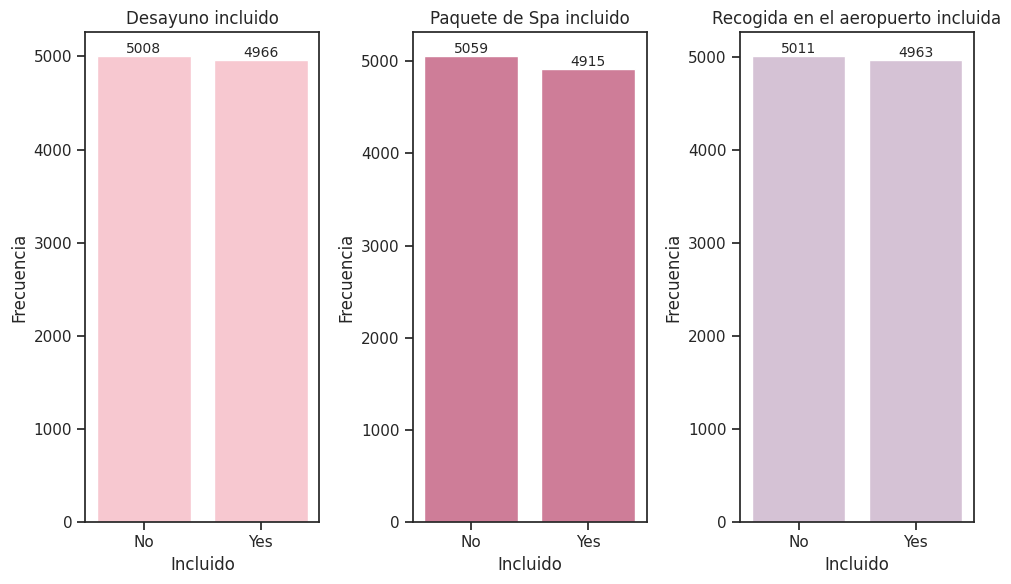

In [ ]:
# Obtener la frecuencia de cada característica
breakfast_frequency = Serenity_sands['Breakfast Included'].value_counts()
spa_frequency = Serenity_sands['Spa Package Included'].value_counts()
pickup_frequency = Serenity_sands['Airport Pickup Included'].value_counts()

# Graficar un gráfico de barras
plt.figure(figsize=(10, 6))

# Gráfico de barras para 'Breakfast Included'
plt.subplot(1, 3, 1)
sns.barplot(x=breakfast_frequency.index, y=breakfast_frequency.values,color='Pink')
plt.title('Desayuno incluido')
plt.xlabel('Incluido')
plt.ylabel('Frecuencia')

# Etiquetas de datos para 'Breakfast Included'
for index, value in enumerate(breakfast_frequency.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Gráfico de barras para 'Spa Package Included'
plt.subplot(1, 3, 2)
sns.barplot(x=spa_frequency.index, y=spa_frequency.values,color='PaleVioletRed')
plt.title('Paquete de Spa incluido')
plt.xlabel('Incluido')
plt.ylabel('Frecuencia')

# Etiquetas de datos para 'Spa Package Included'
for index, value in enumerate(spa_frequency.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Gráfico de barras para 'Airport Pickup Included'
plt.subplot(1, 3, 3)
sns.barplot(x=pickup_frequency.index, y=pickup_frequency.values,color='Thistle')
plt.title('Recogida en el aeropuerto incluida')
plt.xlabel('Incluido')
plt.ylabel('Frecuencia')

# Etiquetas de datos para 'Airport Pickup Included'
for index, value in enumerate(pickup_frequency.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Fuente de contacto para reservar**

Podemos identificar que la mayoria de nuestros huespedes ingresan sus reservas a traves nuestra pagina WEB, seguido de via telefonica, de igual forma debemos denotar la gran concurrencia de reservas o ingresos sobre personas van directo a nuestras instalaciones lo cual no es normal para el sertvicio de hoteleria, se debe evaluar brindarles opciones de reservar desde la comodidad de sus hogares via telefonica o visitando nuestra pagina web.

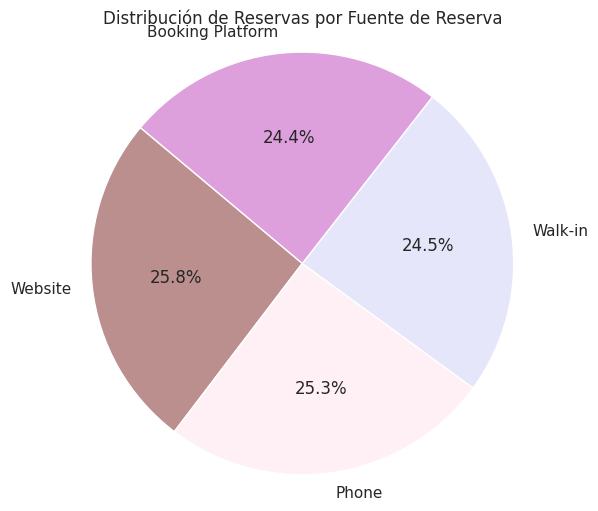

In [ ]:
# Obtener la frecuencia de cada fuente de reserva
reservation_source_frequency = Serenity_sands['Reservation Source'].value_counts()

# Definir los colores personalizados
colors = ['RosyBrown', 'LavenderBlush', 'Lavender', 'Plum']

# Graficar un gráfico de torta para identificar los datos
plt.figure(figsize=(6, 6))
plt.pie(reservation_source_frequency.values, labels=reservation_source_frequency.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribución de Reservas por Fuente de Reserva')
plt.axis('equal')
#Muestra del grafico
plt.show()

**Edades de nuestros huespedes**

De acuerdo a nuestros registros nues tros huespedes mas frecuentes se ensuentran entre los 40, 60 y 80 años de edad, con esto podemos delucidar ademas la poca concurrencia de niños dentro de las reservaciones.

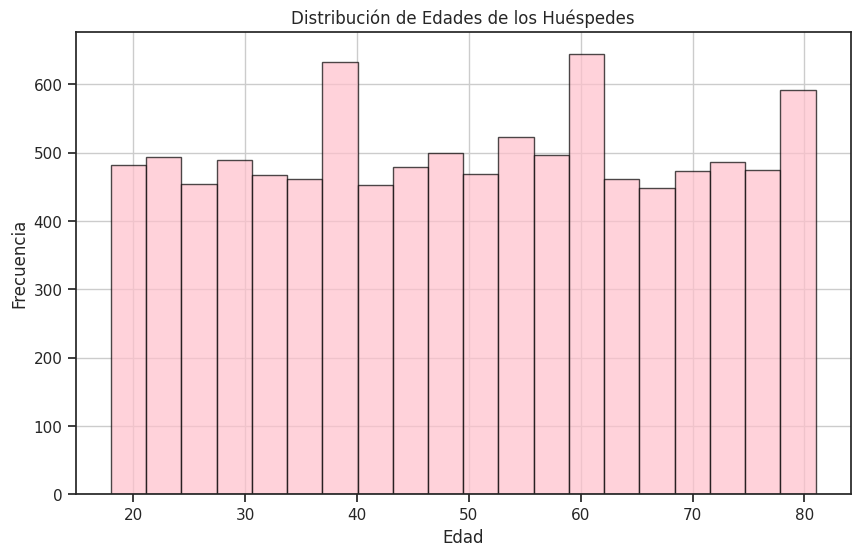

In [ ]:
# Primero, convierte la columna 'Birthday' al formato de fecha si no lo está
Serenity_sands['Birthdate'] = pd.to_datetime(Serenity_sands['Birthdate'])

# Calcula la edad restando la fecha de nacimiento del año actual
current_year = pd.Timestamp.now().year
Serenity_sands['Age'] = current_year - Serenity_sands['Birthdate'].dt.year

# Graficar el histograma de edades
plt.figure(figsize=(10, 6))
plt.hist(Serenity_sands['Age'], bins=20, color='Pink', edgecolor='black', alpha=0.7)
plt.title('Distribución de Edades de los Huéspedes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()